# jojo tohle je začatek cvik 1


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pas_file_handling as pasfh
from pathlib import Path
from scipy import stats
import pas_graph as pasgr

import os
current_dir = os.getcwd()

import importlib
importlib.reload(pasgr)


<module 'pas_graph' from 'c:\\GitHub\\University-stuff-and-small-scale-projects\\1_University\\3_semestr\\pas\\pas_graph.py'>

Matur.drive - četnosti:
             absolutni  relativni (%)
Matur.drive                          
ano                 14           28.0
ne                  36           72.0 

Stat - četnosti:
      absolutni  relativni (%)
stat                          
1            12           24.0
2            30           60.0
3             8           16.0 

Stat - kumulativní četnosti:
      n(i)  N(i)  p(i) [%]  P(i) [%]
stat                                
1       12    12      24.0      24.0
2       30    42      60.0      84.0
3        8    50      16.0     100.0


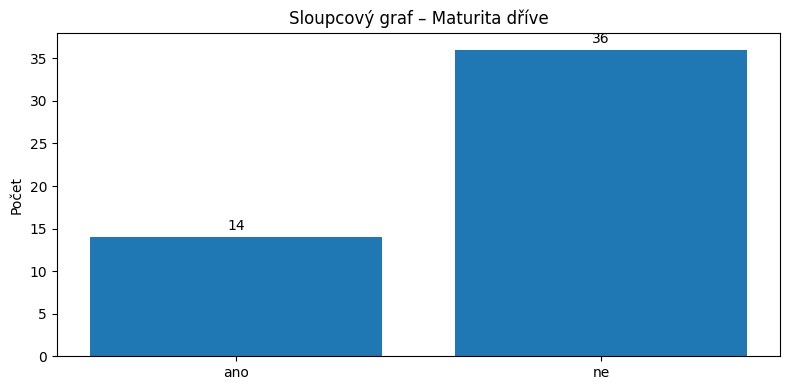

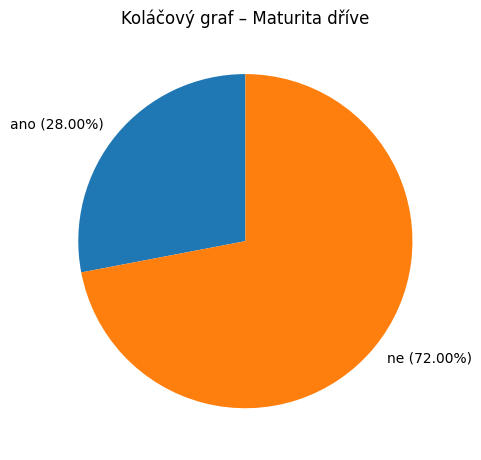

In [42]:
    # --- Načtení dat ze souboru prij.csv ---
prij = pd.read_csv(f"{current_dir}\\python-rewrite\\prij.csv", encoding="utf-8")

# --- Absolutní a relativní četnosti pro Matur.drive ---
matur = prij["Matur.drive"]

# Absolutní četnosti
abs_counts = matur.value_counts().sort_index()

# Relativní četnosti (%)
rel_counts = (abs_counts / abs_counts.sum() * 100).round(2)

# Kombinovaná tabulka
freq_matur = pd.DataFrame({
    "absolutni": abs_counts,
    "relativni (%)": rel_counts
})
print("Matur.drive - četnosti:")
print(freq_matur, "\n")


# --- Absolutní a relativní četnosti pro známky ze statistiky ---
stat = prij["stat"]

abs_stat = stat.value_counts().sort_index()
rel_stat = (abs_stat / abs_stat.sum() * 100).round(2)

freq_stat = pd.DataFrame({
    "absolutni": abs_stat,
    "relativni (%)": rel_stat
})
print("Stat - četnosti:")
print(freq_stat, "\n")


# --- Kumulativní četnosti pro uspořádanou kategorickou proměnnou ---
tab = abs_stat
cum_abs = tab.cumsum()
rel = (tab / tab.sum() * 100).round(2)
cum_rel = rel.cumsum().round(2)

cum_table = pd.DataFrame({ ## neeeeee cumtable neeeee
    "n(i)": tab,
    "N(i)": cum_abs,
    "p(i) [%]": rel,
    "P(i) [%]": cum_rel
})
print("Stat - kumulativní četnosti:")
print(cum_table)

# --- Assume 'matur' already exists from the first part ---
# matur = prij["Matur.drive"]

# Převod na kategorii pro jistotu
matur = pd.Series(matur).astype("category")







# [GRAF] Vstup: counts (četnosti), x_labels, y_values
counts = matur.value_counts().sort_index()

# --- Sloupcový graf ---
pasgr.bar_with_labels(counts, "Sloupcový graf – Maturita dříve", ylabel="Počet")


# --- Koláčový graf s popisky (v procentech) ---
pasgr.pie_with_labels((counts / counts.sum()) if counts.sum() else counts.astype(float), "Koláčový graf – Maturita dříve")












# tohle cvik 2

NUTS2 - unikátní hodnoty:
['Jihozapad' 'Jihovychod' 'Severozapad' 'Severovychod' 'Moravskoslezsko'
 'Stredni Morava' 'Praha' 'Stredni Cechy'] 

Regiony NUTS2 - četnosti:
                 absolutni  relativni (%)
NUTS2                                    
Jihovychod             175          16.28
Jihozapad              141          13.12
Moravskoslezsko        115          10.70
Praha                  124          11.53
Severovychod           138          12.84
Severozapad             72           6.70
Stredni Cechy          164          15.26
Stredni Morava         146          13.58 



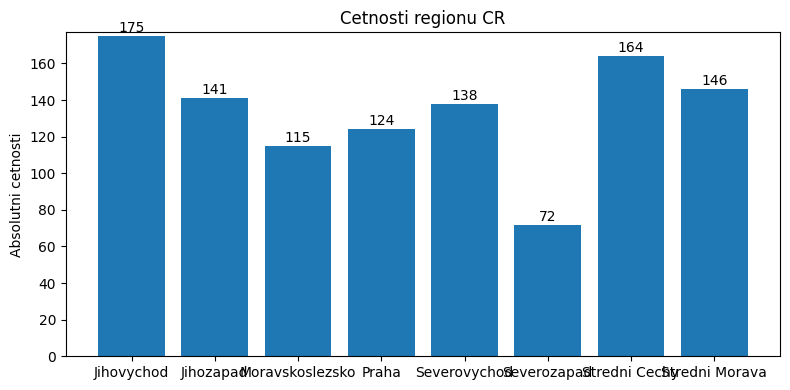

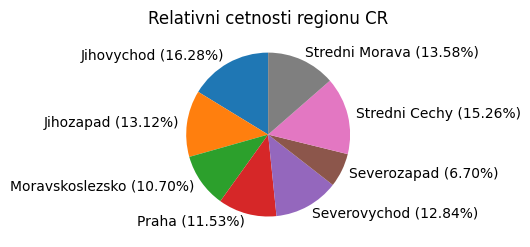

OV_1 - unikátní hodnoty:
['velmi spokojen', 'spíše spokojen', 'ani spokojen, ani nespokojen', 'spíše nespokojen', 'velmi nespokojen']
Categories (5, object): ['velmi spokojen' < 'spíše spokojen' < 'ani spokojen, ani nespokojen' < 'spíše nespokojen' < 'velmi nespokojen'] 

OV_1 - deskriptivní tabulka:
                              n(i)  N(i)  f(i)  F(i)
velmi spokojen                 192   192  0.18  0.18
spíše spokojen                 673   865  0.63  0.81
ani spokojen, ani nespokojen   154  1019  0.14  0.95
spíše nespokojen                46  1065  0.04  0.99
velmi nespokojen                 8  1073  0.01  1.00 



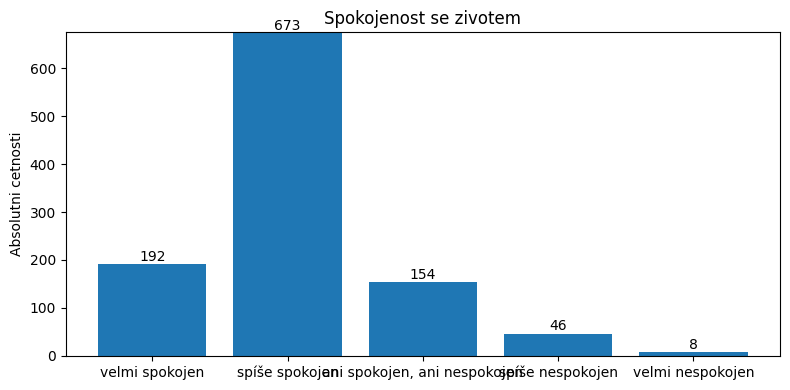

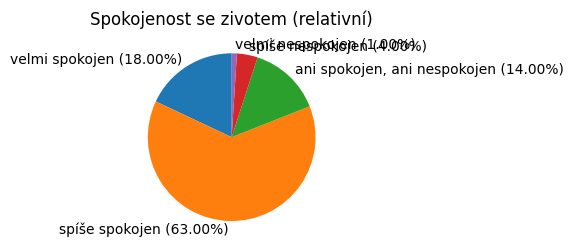

Tabulka pohlaví × důvěra v média:
PI_1z  rozhodně důvěřuji  spíše důvěřuji  spíše nedůvěřuji  \
IDE_8                                                        
Muz                  123             224               101   
Zena                  91             269               135   

PI_1z  rozhodně nedůvěřuji  
IDE_8                       
Muz                     54  
Zena                    65   

Řádkové proporce (podíly v rámci pohlaví):
PI_1z  rozhodně důvěřuji  spíše důvěřuji  spíše nedůvěřuji  \
IDE_8                                                        
Muz                0.245           0.446             0.201   
Zena               0.162           0.480             0.241   

PI_1z  rozhodně nedůvěřuji  
IDE_8                       
Muz                  0.108  
Zena                 0.116   



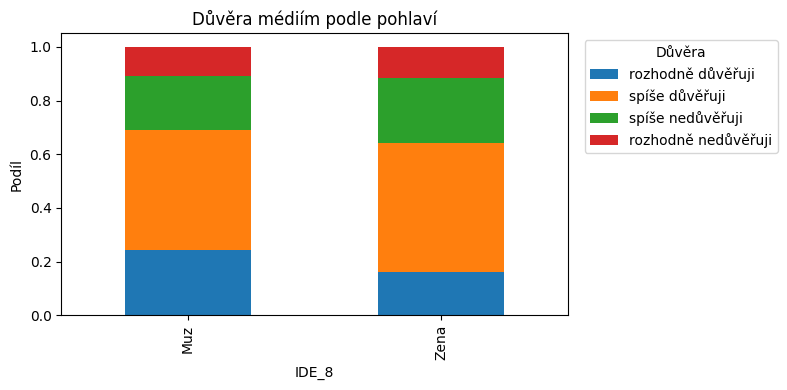

Cylinders - četnosti (včetně 'rotary'):
Cylinders
3          3
4         49
5          2
6         31
8          7
rotary     1
Name: count, dtype: int64 

Cylinders (bez 'rotary') - frekvenční rozdělení:
           n(i)  N(i)  f(i)  F(i)
Cylinders                        
3             3     3  0.03  0.03
4            49    52  0.53  0.56
5             2    54  0.02  0.58
6            31    85  0.34  0.92
8             7    92  0.08  1.00 



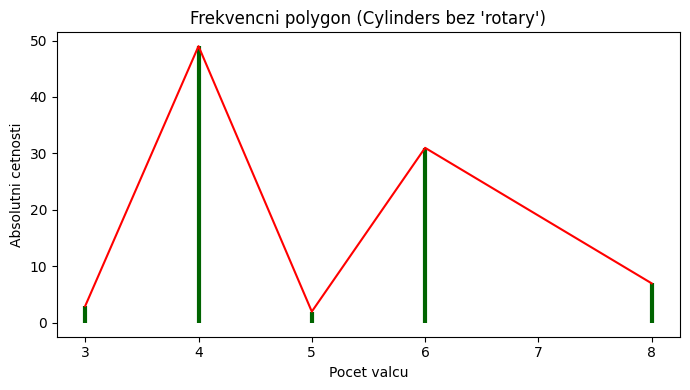

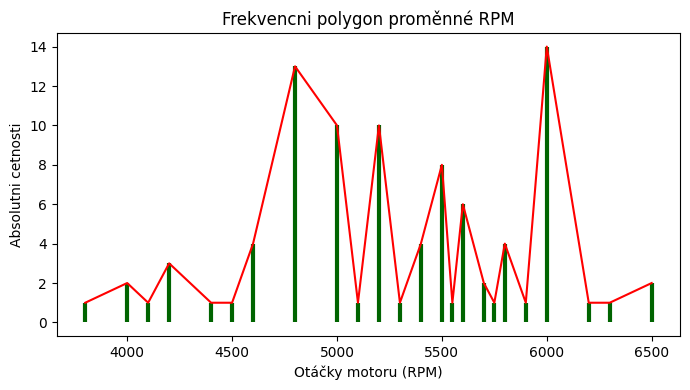

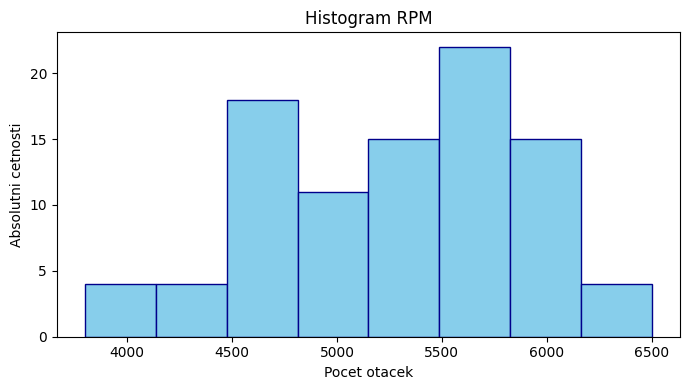

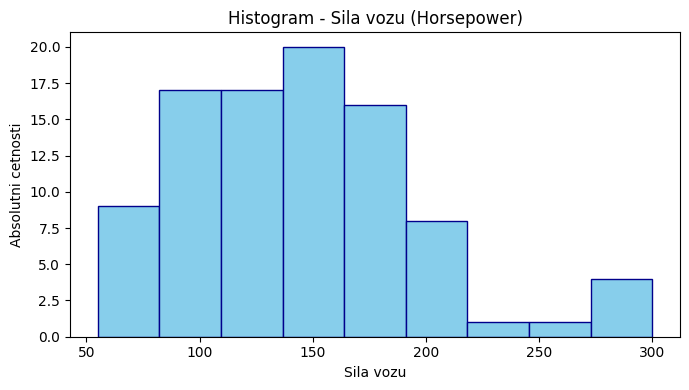

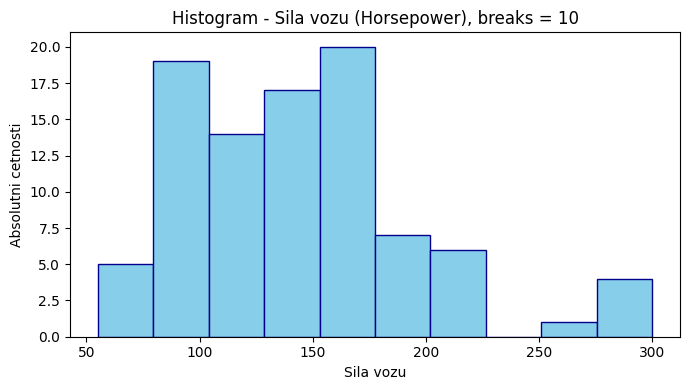

Horsepower - frekvenční rozdělení podle histogramu (10 tříd):
            n(i)  N(i)   f(i)   F(i)
(55, 80]       5     5  0.054  0.054
(80, 104]     19    24  0.204  0.258
(104, 128]    14    38  0.151  0.409
(128, 153]    17    55  0.183  0.592
(153, 178]    20    75  0.215  0.807
(178, 202]     7    82  0.075  0.882
(202, 226]     6    88  0.065  0.947
(226, 251]     0    88  0.000  0.947
(251, 276]     1    89  0.011  0.958
(276, 300]     4    93  0.043  1.001 

Length - summary:
count     93.000000
mean     183.204301
std       14.602382
min      141.000000
25%      174.000000
50%      183.000000
75%      192.000000
max      219.000000
Name: Length, dtype: float64 



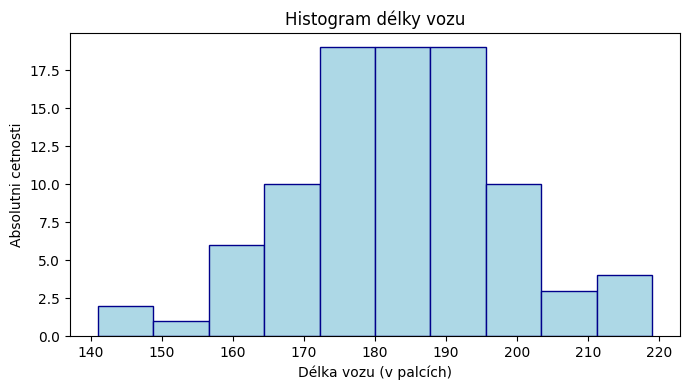

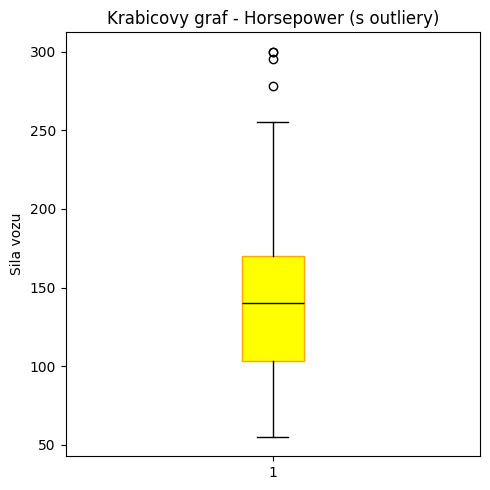

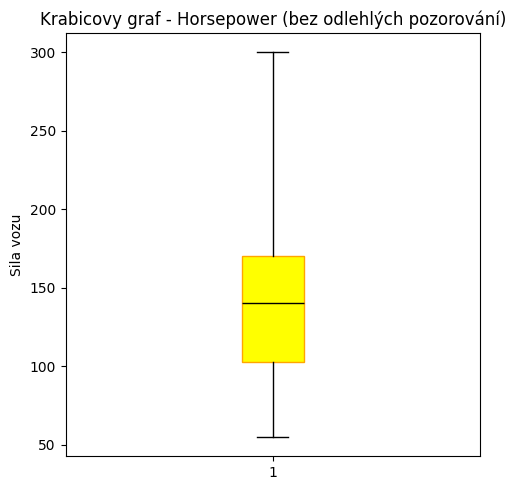

hp - min: 55.0
hp - max: 300.0
hp - Q1 (0.25): 103.0
hp - Q3 (0.75): 170.0
hp - median: 140.0
hp - five-number summary [min, Q1, median, Q3, max]:
[55.0, 103.0, 140.0, 170.0, 300.0] 

hp - mean: 143.8279569892473
hp - summary() ekvivalent:
count     93.000000
mean     143.827957
std       52.374410
min       55.000000
25%      103.000000
50%      140.000000
75%      170.000000
max      300.000000
Name: Horsepower, dtype: float64 

Length - summary:
count     93.000000
mean     183.204301
std       14.602382
min      141.000000
25%      174.000000
50%      183.000000
75%      192.000000
max      219.000000
Name: Length, dtype: float64 



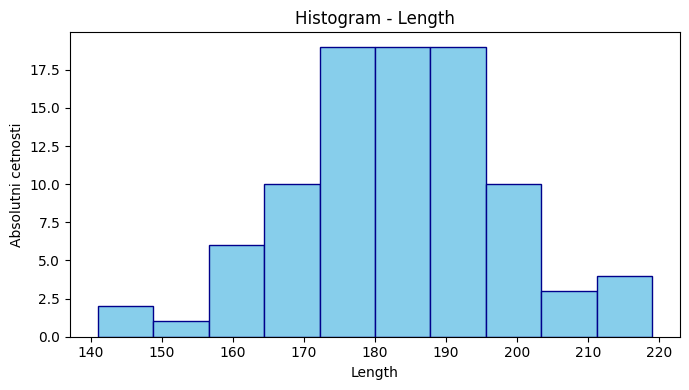

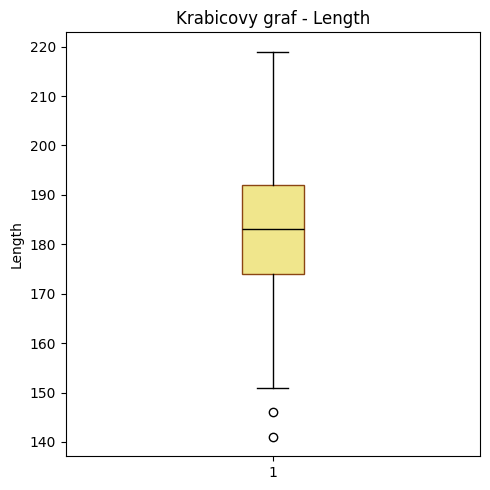

Price - summary:
count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64 



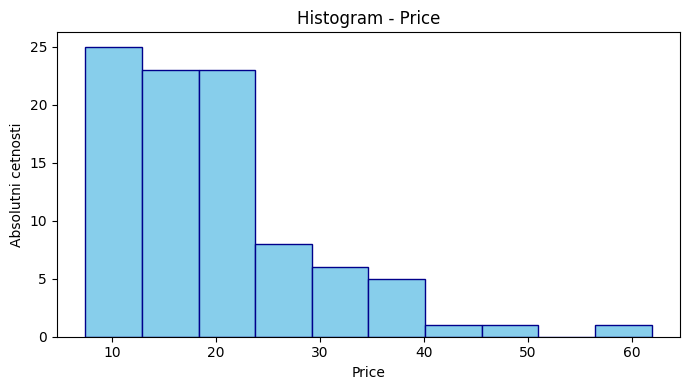

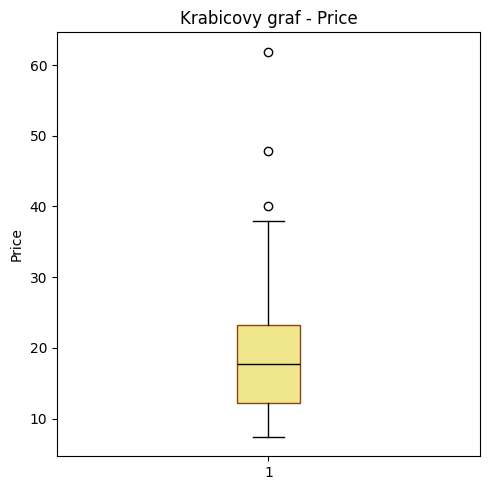

Weight - summary:
count      93.000000
mean     3072.903226
std       589.896510
min      1695.000000
25%      2620.000000
50%      3040.000000
75%      3525.000000
max      4105.000000
Name: Weight, dtype: float64 



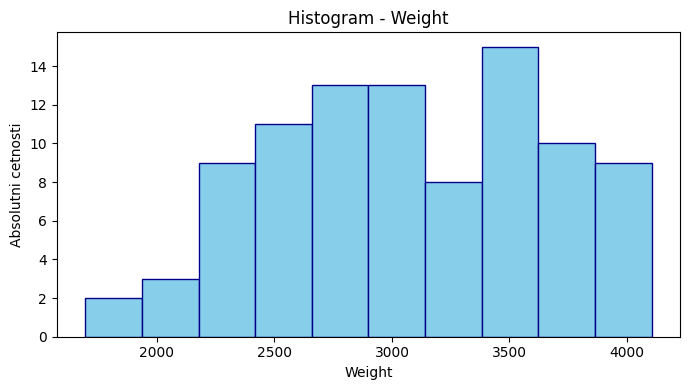

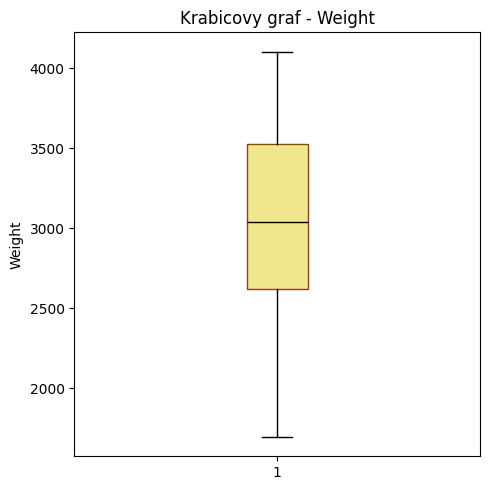

Cena podle původu (groupby/summary):
         count       mean        std  min     25%   50%     75%   max
Origin                                                               
USA       48.0  18.572917   7.816914  7.4  13.475  16.3  20.725  40.1
non-USA   45.0  20.508889  11.306752  8.0  11.600  19.1  26.700  61.9 



In [43]:
# -------------------------------
# Načtení dat
# -------------------------------

duvera_path = Path(f"{current_dir}\\python-rewrite\\duvera.csv")
cars_path   = Path(f"{current_dir}\\python-rewrite\\Cars93.csv")

if not duvera_path.exists():
    raise FileNotFoundError("Soubor 'duvera.csv' nebyl nalezen.")
duvera = pd.read_csv(duvera_path, encoding="utf-8")

if cars_path.exists():
    cars = pd.read_csv(cars_path, encoding="utf-8")
else:
    print("[UPOZORNĚNÍ] 'Cars93.csv' nebyl nalezen. Číselná část (Cars93) bude přeskočena.")
    cars = None

# -------------------------------
# Region - NUTS2 (nominální)
# -------------------------------

nuts2_labels = [
    "Praha", "Stredni Cechy", "Jihozapad", "Severozapad",
    "Severovychod", "Jihovychod", "Stredni Morava", "Moravskoslezsko"
]
nuts2_raw = duvera["NUTS2"]

# Pokud jsou hodnoty 1..8 → mapuj na labels. Jinak ponech textové hodnoty.
if pd.to_numeric(nuts2_raw, errors="coerce").dropna().between(1, 8).all():
    nuts2 = pd.to_numeric(nuts2_raw, errors="coerce").map({i+1: lab for i, lab in enumerate(nuts2_labels)})
else:
    nuts2 = nuts2_raw.astype(str).where(nuts2_raw.notna())

print("NUTS2 - unikátní hodnoty:")
print(pd.Series(nuts2).dropna().unique(), "\n")

freq_nuts2 = pasgr.freq_table(nuts2)
print("Regiony NUTS2 - četnosti:")
print(freq_nuts2, "\n")




# Grafy
counts_nuts2 = pd.Series(nuts2).value_counts().sort_index()
pasgr.bar_with_labels(counts_nuts2, "Cetnosti regionu CR")
props_nuts2 = (counts_nuts2 / counts_nuts2.sum()) if counts_nuts2.sum() else counts_nuts2.astype(float)
pasgr.pie_with_labels(props_nuts2, "Relativni cetnosti regionu CR")

# -------------------------------
# Spokojenost se životem (OV_1) - ordinální, opravené mapování
# -------------------------------

ov1_labels = [
    "velmi spokojen", "spíše spokojen", "ani spokojen, ani nespokojen",
    "spíše nespokojen", "velmi nespokojen"
]
ov1_map = {i+1: lab for i, lab in enumerate(ov1_labels)}

ov_1_codes = pd.to_numeric(duvera["OV_1"], errors="coerce")
# Vezmi pouze 1..5, ostatní (0, 8, 9, 99…) → NaN
ov_1 = ov_1_codes.where(ov_1_codes.between(1, 5)).map(ov1_map)
ov_1 = pd.Categorical(ov_1, categories=ov1_labels, ordered=True)

print("OV_1 - unikátní hodnoty:")
print(pd.Series(ov_1).dropna().unique(), "\n")

ac_ov1 = pd.Series(ov_1).value_counts().reindex(ov1_labels, fill_value=0)
if ac_ov1.sum() == 0:
    print("OV_1 - deskriptivní tabulka: žádná validní 1..5 data po očištění.\n")
else:
    kac = ac_ov1.cumsum()
    rc = (ac_ov1 / ac_ov1.sum()).round(2)
    krc = rc.cumsum().round(2)
    tab_ov1 = pd.DataFrame({"n(i)": ac_ov1, "N(i)": kac, "f(i)": rc, "F(i)": krc})
    print("OV_1 - deskriptivní tabulka:")
    print(tab_ov1, "\n")

    pasgr.bar_with_labels(ac_ov1, "Spokojenost se zivotem")
    pasgr.pie_with_labels(rc, "Spokojenost se zivotem (relativní)")

# -------------------------------
# Důvěra v média podle pohlaví
# -------------------------------

# pohlaví: 1 -> Muž, 2 -> Žena
pohlavi_codes = pd.to_numeric(duvera.get("IDE_8"), errors="coerce")
pohlavi = pohlavi_codes.map({1: "Muz", 2: "Zena"})

# PI_1z: ponech 1..4, ostatní NaN; mapuj na text
pi_labels = ["rozhodně důvěřuji", "spíše důvěřuji", "spíše nedůvěřuji", "rozhodně nedůvěřuji"]
pi_map = {i+1: lab for i, lab in enumerate(pi_labels)}
pi_codes = pd.to_numeric(duvera.get("PI_1z"), errors="coerce")
pi_clean = pi_codes.where(pi_codes.between(1, 4)).map(pi_map)

tab = pd.crosstab(pohlavi, pi_clean).reindex(columns=pi_labels, fill_value=0).dropna(how="all")
print("Tabulka pohlaví × důvěra v média:")
print(tab, "\n")

if tab.size and tab.to_numpy().sum() > 0:
    row_props = tab.div(tab.sum(axis=1), axis=0).fillna(0).round(3)
    print("Řádkové proporce (podíly v rámci pohlaví):")
    print(row_props, "\n")

    # [GRAF] Vstup: row_props
    pasgr.stacked_barplot(row_props, title="Důvěra médiím podle pohlaví", ylabel="Podíl", legend_title="Důvěra")
else:
    print("Kontingenční tabulka prázdná - zkontrolujte sloupce IDE_8 a PI_1z.\n")

# -------------------------------
# Číselné proměnné - Cars93 (pokud dataset existuje)
# -------------------------------


if cars is not None:
    # Cylinders včetně 'rotary'
    valce = cars["Cylinders"].astype(str)
    ac_all = valce.value_counts().sort_index()
    print("Cylinders - četnosti (včetně 'rotary'):")
    print(ac_all, "\n")

    # Bez 'rotary'
    valce2 = valce[valce != "rotary"]
    ac = valce2.value_counts().sort_index()
    kac = ac.cumsum()
    rc = (ac / ac.sum()).round(2) if ac.sum() else ac.astype(float)
    krc = rc.cumsum().round(2) if ac.sum() else rc
    tab_valce2 = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
    print("Cylinders (bez 'rotary') - frekvenční rozdělení:")
    print(tab_valce2, "\n")

    # Frekvenční polygon pro valce2
    # Pouze hodnoty, které lze převést na číslo:
    x_vals = pd.to_numeric(ac.index, errors="coerce")
    mask = ~x_vals.isna()
    pasgr.freq_polygon(x_vals[mask], ac.values[mask], "Frekvencni polygon (Cylinders bez 'rotary')", "Pocet valcu")

    # RPM - polygon + histogram
    rpm = pd.to_numeric(cars["RPM"], errors="coerce").dropna()
    ac_rpm = rpm.value_counts().sort_index()
    pasgr.freq_polygon(ac_rpm.index, ac_rpm.values, "Frekvencni polygon proměnné RPM", "Otáčky motoru (RPM)")

    pasgr.histogram_with_labels(rpm, title="Histogram RPM", bins="auto", color="skyblue", edgecolor="darkblue", xlabel="Pocet otacek", ylabel="Absolutni cetnosti")

    # Horsepower (hp) - histogramy, frekvenční rozdělení, boxploty, kvantily
    hp = pd.to_numeric(cars["Horsepower"], errors="coerce").dropna()

    # [GRAF] Vstup: hp
    pasgr.histogram_with_labels(hp, title="Histogram - Sila vozu (Horsepower)", bins="auto", color="skyblue", edgecolor="darkblue", xlabel="Sila vozu", ylabel="Absolutni cetnosti")

    # [GRAF] Vstup: hp
    pasgr.histogram_with_labels(hp, title="Histogram - Sila vozu (Horsepower), breaks = 10", bins=10, color="skyblue", edgecolor="darkblue", xlabel="Sila vozu", ylabel="Absolutni cetnosti")

    
    # [GRAF] Vstup: ac_hp
    # Histogram summary table (not a plot, but related)
    counts, breaks = np.histogram(hp, bins=10)
    labels = [f"({breaks[i]:.0f}, {breaks[i+1]:.0f}]" for i in range(len(breaks)-1)]
    ac_hp = pd.Series(counts, index=labels)
    kac_hp = ac_hp.cumsum()
    rc_hp = (ac_hp / ac_hp.sum()).round(3) if ac_hp.sum() else ac_hp.astype(float)
    krc_hp = rc_hp.cumsum().round(3) if ac_hp.sum() else rc_hp
    freq_hp = pd.DataFrame({"n(i)": ac_hp, "N(i)": kac_hp, "f(i)": rc_hp, "F(i)": krc_hp})
    print("Horsepower - frekvenční rozdělení podle histogramu (10 tříd):")
    print(freq_hp, "\n")

    # Length - histogram + summary
    length = pd.to_numeric(cars["Length"], errors="coerce").dropna()
    print("Length - summary:")
    print(length.describe(), "\n")

    pasgr.histogram_with_labels(length, title="Histogram délky vozu", bins=10, color="lightblue", edgecolor="darkblue", xlabel="Délka vozu (v palcích)", ylabel="Absolutni cetnosti")


    # [GRAF] Vstup: hp
    pasgr.boxplot_with_labels(hp, title="Krabicovy graf - Horsepower (s outliery)", ylabel="Sila vozu", color="yellow", edgecolor="orange", median_color="black", showfliers=True)


    # Bez odlehlých (whis=3 ~ range=3 v R)
    pasgr.boxplot_with_labels(hp, title="Krabicovy graf - Horsepower (bez odlehlých pozorování)", ylabel="Sila vozu", color="yellow", edgecolor="orange", median_color="black", showfliers=False, whis=3)


    
    # Kvantily, pěticíslo, průměr, summary
    print("hp - min:", float(hp.min()))
    print("hp - max:", float(hp.max()))
    print("hp - Q1 (0.25):", float(hp.quantile(0.25)))
    print("hp - Q3 (0.75):", float(hp.quantile(0.75)))
    print("hp - median:", float(hp.median()))
    five_num = [float(hp.min()), float(hp.quantile(0.25)), float(hp.median()),
                float(hp.quantile(0.75)), float(hp.max())]
    print("hp - five-number summary [min, Q1, median, Q3, max]:")
    print(five_num, "\n")
    print("hp - mean:", float(hp.mean()))
    print("hp - summary() ekvivalent:")
    print(hp.describe(), "\n")

    # Další proměnné: Length, Price, Weight
    for var in ["Length", "Price", "Weight"]:
        s = pd.to_numeric(cars[var], errors="coerce").dropna()
        print(f"{var} - summary:")
        print(s.describe(), "\n")

        pasgr.histogram_with_labels(s, title=f"Histogram - {var}", bins=10, color="skyblue", edgecolor="darkblue", xlabel=var, ylabel="Absolutni cetnosti")


        pasgr.boxplot_with_labels(s, title=f"Krabicovy graf - {var}", ylabel=var, color="khaki", edgecolor="saddlebrown", median_color="black")

    # Porovnání skupin - cena podle původu
    if "Origin" in cars.columns and "Price" in cars.columns:
        puvod = cars["Origin"]
        cena = pd.to_numeric(cars["Price"], errors="coerce")
        grp_summary = cena.groupby(puvod).describe()
        print("Cena podle původu (groupby/summary):")
        print(grp_summary, "\n")


# Cvika 3


Diastolický tlak – frekvenční rozdělení:

       n(i)  N(i)  f(i)  F(i)
diast                        
48        1     1  0.02  0.02
60        1     2  0.02  0.04
64        4     6  0.08  0.12
67        2     8  0.04  0.16
68        2    10  0.04  0.20
69        1    11  0.02  0.22
70        2    13  0.04  0.26
71        2    15  0.04  0.30
72        2    17  0.04  0.34
73        6    23  0.12  0.46
74        4    27  0.08  0.54
75        1    28  0.02  0.56
76        3    31  0.06  0.62
77        4    35  0.08  0.70
78        3    38  0.06  0.76
79        2    40  0.04  0.80
80        1    41  0.02  0.82
81        1    42  0.02  0.84
87        4    46  0.08  0.92
88        1    47  0.02  0.94
89        1    48  0.02  0.96
90        2    50  0.04  1.00 



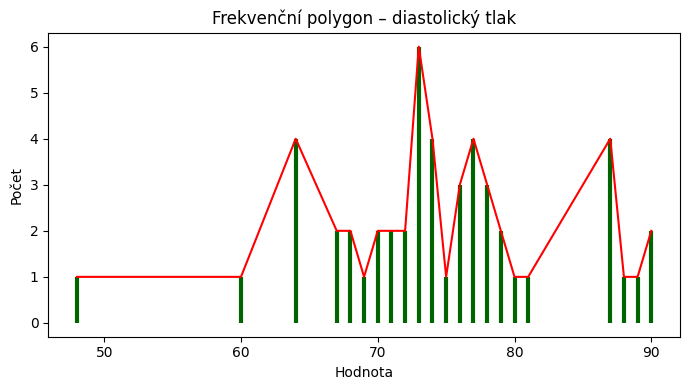

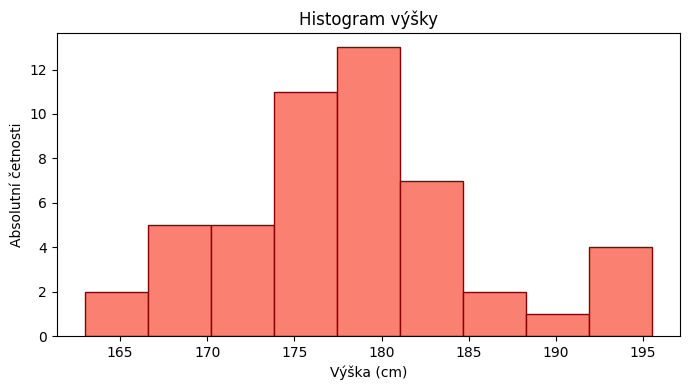

Výška – frekvenční rozdělení:

            n(i)  N(i)  f(i)  F(i)
(163, 166]     2     2  0.04  0.04
(166, 170]     5     7  0.10  0.14
(170, 173]     3    10  0.06  0.20
(173, 176]     8    18  0.16  0.36
(176, 179]    10    28  0.20  0.56
(179, 182]    12    40  0.24  0.80
(182, 186]     3    43  0.06  0.86
(186, 189]     3    46  0.06  0.92
(189, 192]     1    47  0.02  0.94
(192, 196]     3    50  0.06  1.00 



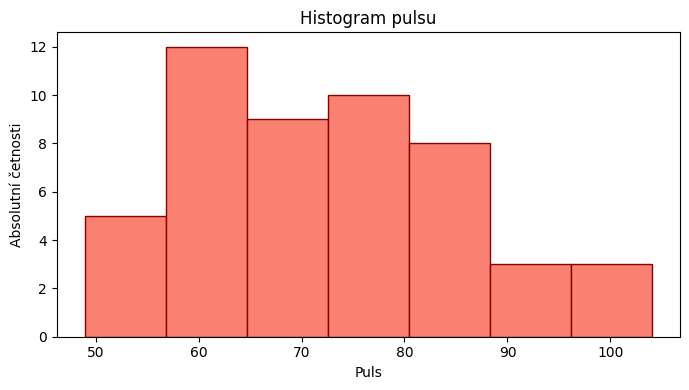

Puls – frekvenční rozdělení:

           n(i)  N(i)  f(i)  F(i)
(49, 54]      3     3  0.06  0.06
(54, 60]      3     6  0.06  0.12
(60, 66]     12    18  0.24  0.36
(66, 71]      5    23  0.10  0.46
(71, 76]      9    32  0.18  0.64
(76, 82]      6    38  0.12  0.76
(82, 88]      5    43  0.10  0.86
(88, 93]      4    47  0.08  0.94
(93, 98]      0    47  0.00  0.94
(98, 104]     3    50  0.06  1.00 



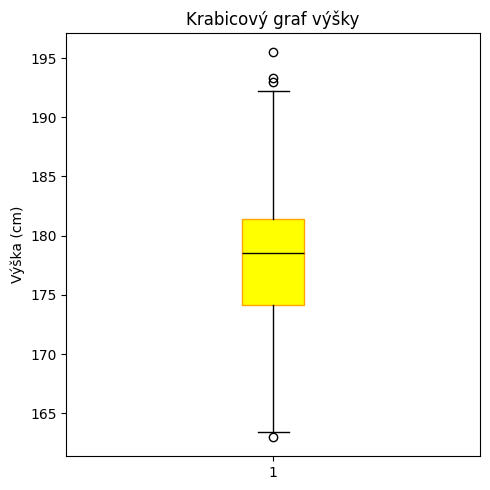

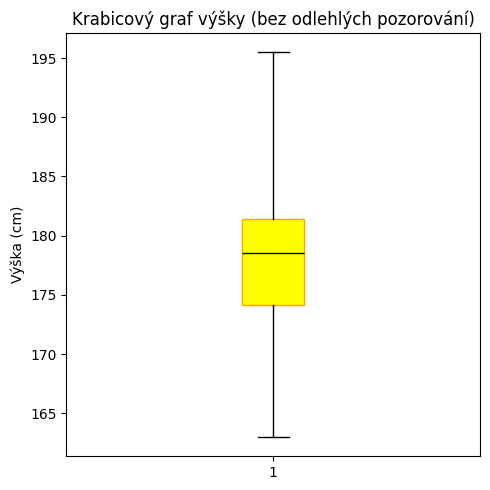

Výška – popisné statistiky polohy:

min: 163.0
max: 195.5
Q1: 174.175
Q3: 181.4
median: 178.5
five-number summary: [np.float64(163.0), np.float64(174.175), np.float64(178.5), np.float64(181.4), np.float64(195.5)]
mean: 178.28
summary():
 count     50.000000
mean     178.280000
std        7.178056
min      163.000000
25%      174.175000
50%      178.500000
75%      181.400000
max      195.500000
Name: height, dtype: float64 



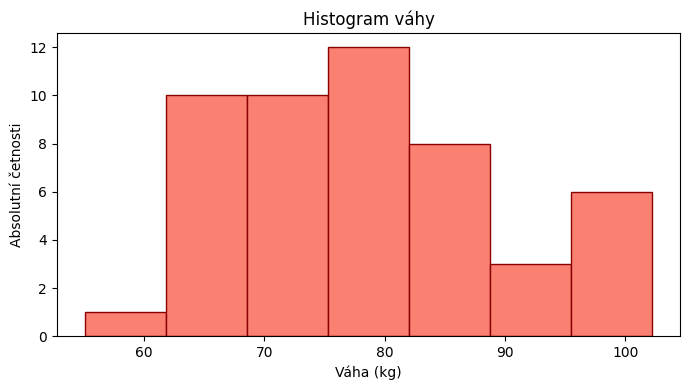

Váha – vážený průměr (odhad z histogramu): 78.27
summary():
 count     50.000000
mean      78.448000
std       11.452996
min       55.100000
25%       69.700000
50%       77.950000
75%       86.850000
max      102.200000
Name: weight, dtype: float64 



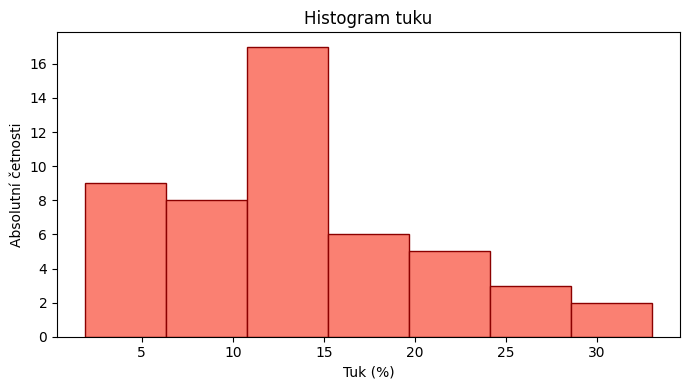

Tuk – popisné statistiky polohy:
 count    50.000000
mean     13.688000
std       7.391325
min       1.900000
25%       9.575000
50%      12.350000
75%      18.200000
max      33.000000
Name: fat, dtype: float64 

Výška – popisné statistiky variability:

Rozptyl: 51.524489795918385
Směr. odchylka: 7.178056129337412
IQR: 7.224999999999994
MAD: 3.5
Variabilita (koef. variace): 0.0402628232518365

Váha – popisné statistiky variability:

Rozptyl: 131.17111836734696
Směr. odchylka: 11.452996043278237
Koef. variace: 0.1459947486650805

Z-skóry – výška (ukázka): [ 0.18576079 -0.33493233 -1.39039135 -0.61638807  0.65016276]
Šikmost (skewness): 0.24006436510074095
Špičatost (kurtosis): 0.1779200665170788

Tuk – tvar rozdělení:

Šikmost: 0.6636229438266902
Špičatost: -0.07608876867067416


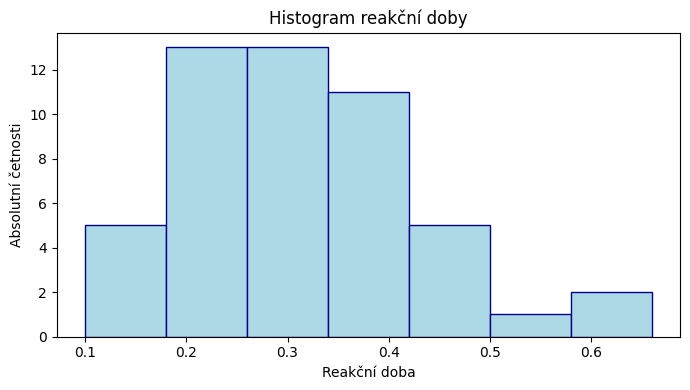

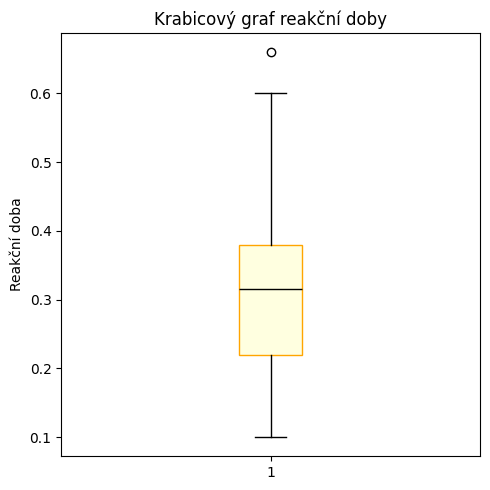


Vliv posunu a změny měřítka na statistiky:

           Průměr  Sm. odch.   Šikmost  Špičatost
vyska      178.28   7.178056  0.240064    0.17792
vyska+10   188.28   7.178056  0.240064    0.17792
vyska*10  1782.80  71.780561  0.240064    0.17792 



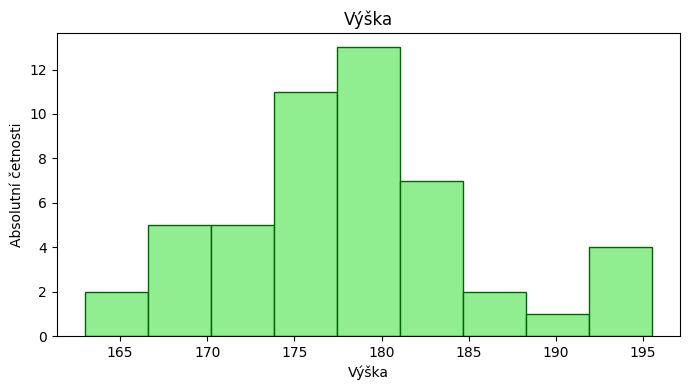

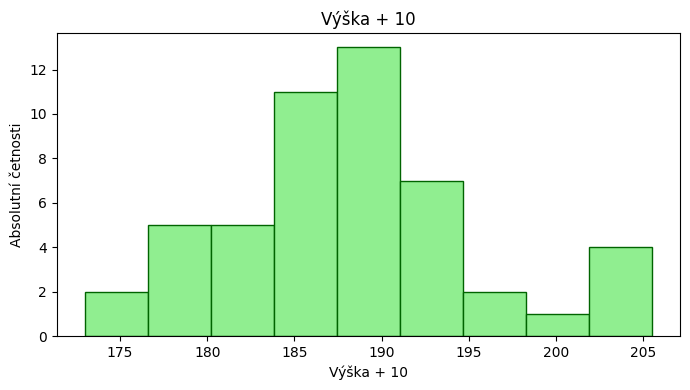

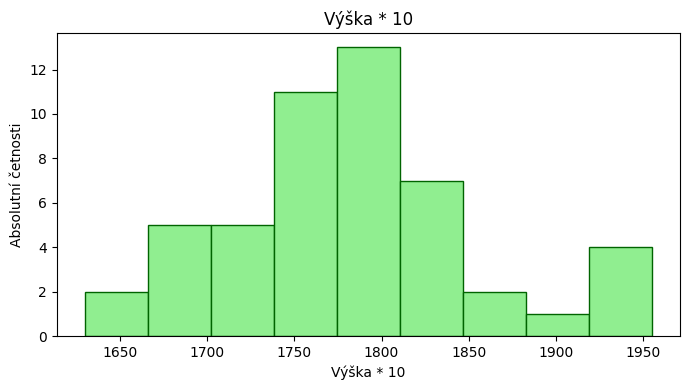

In [45]:
# ---------------------------------------------------
# 1. Načtení dat
# ---------------------------------------------------
policie = pd.read_csv(f"{current_dir}\\python-rewrite\\policie.csv", encoding="utf-8")

# Pomocné funkce
def freq_table(series, bins=None):
    """Vrací DataFrame s četnostmi (n, N, f, F)."""
    if bins is not None:
        counts, edges = np.histogram(series.dropna(), bins=bins)
        labels = [f"({edges[i]:.0f}, {edges[i+1]:.0f}]" for i in range(len(edges)-1)]
        ac = pd.Series(counts, index=labels)
    else:
        ac = series.value_counts().sort_index()
    kac = ac.cumsum()
    rc = (ac / ac.sum()).round(2)
    krc = rc.cumsum().round(2)
    return pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})

def freq_polygon(x, y, title, color="darkblue"):
    plt.figure(figsize=(7,4))
    plt.vlines(x, ymin=0, ymax=y, color=color, linewidth=2)
    plt.plot(x, y, color="royalblue")
    plt.title(title)
    plt.xlabel("Hodnota")
    plt.ylabel("Počet")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------
# 2. Frekvenční rozdělení – diastolický tlak
# ---------------------------------------------------
diast = pd.to_numeric(policie["diast"], errors="coerce").dropna()

ac = diast.value_counts().sort_index()
kac = ac.cumsum()
rc = (ac / ac.sum()).round(2)
krc = rc.cumsum().round(2)
freq_diast = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
print("Diastolický tlak – frekvenční rozdělení:\n")
print(freq_diast, "\n")

# Frekvenční polygon
x = ac.index.to_numpy()
y = ac.values
pasgr.freq_polygon(x, y, "Frekvenční polygon – diastolický tlak", "Hodnota", "Počet")

# ---------------------------------------------------
# 3. Výška – histogram + frekvenční rozdělení
# ---------------------------------------------------
vyska = pd.to_numeric(policie["height"], errors="coerce").dropna()

pasgr.histogram_with_labels(
    vyska,
    title="Histogram výšky",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Výška (cm)",
    ylabel="Absolutní četnosti"
)
# -
# plt.figure(figsize=(7,4))
# plt.hist(vyska, color="salmon", edgecolor="darkred", bins="auto")
# plt.xlabel("Výška (cm)")
# plt.title("Histogram výšky")
# plt.tight_layout()
# plt.show()

counts, breaks = np.histogram(vyska, bins=10)
labels = [f"({breaks[i]:.0f}, {breaks[i+1]:.0f}]" for i in range(len(breaks)-1)]
ac = pd.Series(counts, index=labels)
kac = ac.cumsum()
rc = (ac / ac.sum()).round(2)
krc = rc.cumsum().round(2)
freq_vyska = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
print("Výška – frekvenční rozdělení:\n")
print(freq_vyska, "\n")

# ---------------------------------------------------
# 4. Puls – histogram + frekvenční rozdělení
# ---------------------------------------------------
puls = pd.to_numeric(policie["pulse"], errors="coerce").dropna()

pasgr.histogram_with_labels(
    puls,
    title="Histogram pulsu",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Puls",
    ylabel="Absolutní četnosti"
)
# -
# plt.figure(figsize=(7,4))
# plt.hist(puls, color="salmon", edgecolor="darkred", bins="auto")
# plt.xlabel("Puls")
# plt.title("Histogram pulsu")
# plt.tight_layout()
# plt.show()

counts, breaks = np.histogram(puls, bins=10)
labels = [f"({breaks[i]:.0f}, {breaks[i+1]:.0f}]" for i in range(len(breaks)-1)]
ac = pd.Series(counts, index=labels)
kac = ac.cumsum()
rc = (ac / ac.sum()).round(2)
krc = rc.cumsum().round(2)
freq_puls = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
print("Puls – frekvenční rozdělení:\n")
print(freq_puls, "\n")

# ---------------------------------------------------
# 5. Krabicový graf a kvantily – výška
# ---------------------------------------------------
pasgr.boxplot_with_labels(
    vyska,
    title="Krabicový graf výšky",
    ylabel="Výška (cm)",
    color="yellow",
    edgecolor="orange",
    median_color="black",
    showfliers=True
)
# -
# plt.figure(figsize=(5,5))
# plt.boxplot(vyska, patch_artist=True,
#             boxprops=dict(facecolor="yellow", edgecolor="orange"),
#             medianprops=dict(color="black"))
# plt.title("Krabicový graf výšky")
# plt.ylabel("Výška (cm)")
# plt.tight_layout()
# plt.show()

# Bez odlehlých
pasgr.boxplot_with_labels(
    vyska,
    title="Krabicový graf výšky (bez odlehlých pozorování)",
    ylabel="Výška (cm)",
    color="yellow",
    edgecolor="orange",
    median_color="black",
    showfliers=False,
    whis=3
)
# -
# plt.figure(figsize=(5,5))
# plt.boxplot(vyska, patch_artist=True, whis=3,
#             boxprops=dict(facecolor="yellow", edgecolor="orange"),
#             medianprops=dict(color="black"), showfliers=False)
# plt.title("Krabicový graf výšky (bez odlehlých pozorování)")
# plt.ylabel("Výška (cm)")
# plt.tight_layout()
# plt.show()

# Kvantily / percentily
print("Výška – popisné statistiky polohy:\n")
print("min:", vyska.min())
print("max:", vyska.max())
print("Q1:", vyska.quantile(0.25))
print("Q3:", vyska.quantile(0.75))
print("median:", vyska.median())
print("five-number summary:", [vyska.min(), vyska.quantile(0.25), vyska.median(), vyska.quantile(0.75), vyska.max()])
print("mean:", vyska.mean())
print("summary():\n", vyska.describe(), "\n")

# ---------------------------------------------------
# 6. Hmotnost – histogram a průměr odhadem
# ---------------------------------------------------
vaha = pd.to_numeric(policie["weight"], errors="coerce").dropna()

pasgr.histogram_with_labels(
    vaha,
    title="Histogram váhy",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Váha (kg)",
    ylabel="Absolutní četnosti"
)
# -
# plt.figure(figsize=(7,4))
# plt.hist(vaha, color="salmon", edgecolor="darkred", bins="auto")
# plt.xlabel("Váha (kg)")
# plt.title("Histogram váhy")
# plt.tight_layout()
# plt.show()

counts, mids = np.histogram(vaha, bins=10)
midpoints = 0.5 * (mids[1:] + mids[:-1])
weighted_mean = np.average(midpoints, weights=counts)
print("Váha – vážený průměr (odhad z histogramu):", round(weighted_mean, 2))
print("summary():\n", vaha.describe(), "\n")

# ---------------------------------------------------
# 7. Tuk (%) – histogram + popisné statistiky
# ---------------------------------------------------
tuk = pd.to_numeric(policie["fat"], errors="coerce").dropna()
pasgr.histogram_with_labels(
    tuk,
    title="Histogram tuku",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Tuk (%)",
    ylabel="Absolutní četnosti"
)
# -
# plt.figure(figsize=(7,4))
# plt.hist(tuk, color="salmon", edgecolor="darkred", bins="auto")
# plt.xlabel("Tuk (%)")
# plt.title("Histogram tuku")
# plt.tight_layout()
# plt.show()

print("Tuk – popisné statistiky polohy:\n", tuk.describe(), "\n")

# ---------------------------------------------------
# 8. Variabilita – výška
# ---------------------------------------------------
print("Výška – popisné statistiky variability:\n")
print("Rozptyl:", vyska.var())
print("Směr. odchylka:", vyska.std())
print("IQR:", vyska.quantile(0.75) - vyska.quantile(0.25))
print("MAD:", stats.median_abs_deviation(vyska))
print("Variabilita (koef. variace):", vyska.std() / vyska.mean())

# ---------------------------------------------------
# 9. Variabilita – váha
# ---------------------------------------------------
print("\nVáha – popisné statistiky variability:\n")
print("Rozptyl:", vaha.var())
print("Směr. odchylka:", vaha.std())
print("Koef. variace:", vaha.std() / vaha.mean())

# ---------------------------------------------------
# 10. Tvar rozdělení – výška
# ---------------------------------------------------
z_vyska = stats.zscore(vyska, nan_policy="omit")
print("\nZ-skóry – výška (ukázka):", z_vyska[:5])
print("Šikmost (skewness):", stats.skew(vyska, nan_policy="omit"))
print("Špičatost (kurtosis):", stats.kurtosis(vyska, nan_policy="omit"))

# ---------------------------------------------------
# 11. Tuk – tvar rozdělení
# ---------------------------------------------------
print("\nTuk – tvar rozdělení:\n")
print("Šikmost:", stats.skew(tuk, nan_policy='omit'))
print("Špičatost:", stats.kurtosis(tuk, nan_policy='omit'))

# ---------------------------------------------------
# 12. Reakční doba – histogram + boxplot
# ---------------------------------------------------
doba = pd.to_numeric(policie["react"], errors="coerce").dropna()
pasgr.histogram_with_labels(
    doba,
    title="Histogram reakční doby",
    bins="auto",
    color="lightblue",
    edgecolor="darkblue",
    xlabel="Reakční doba",
    ylabel="Absolutní četnosti"
)
# -
# plt.figure(figsize=(7,4))
# plt.hist(doba, color="lightblue", edgecolor="darkblue", bins="auto")
# plt.xlabel("Reakční doba")
# plt.title("Histogram reakční doby")
# plt.tight_layout()
# plt.show()

pasgr.boxplot_with_labels(
    doba,
    title="Krabicový graf reakční doby",
    ylabel="Reakční doba",
    color="lightyellow",
    edgecolor="orange",
    median_color="black"
)
# plt.figure(figsize=(5,5))
# plt.boxplot(doba, patch_artist=True,
#             boxprops=dict(facecolor="lightyellow", edgecolor="orange"),
#             medianprops=dict(color="black"))
# plt.title("Krabicový graf reakční doby")
# plt.ylabel("Reakční doba")
# plt.tight_layout()
# plt.show()

# ---------------------------------------------------
# 13. Posun a změna měřítka (výška)
# ---------------------------------------------------
vyska_p = vyska + 10
vyska_m = vyska * 10

summary_shift = pd.DataFrame({
    "Průměr": [vyska.mean(), vyska_p.mean(), vyska_m.mean()],
    "Sm. odch.": [vyska.std(), vyska_p.std(), vyska_m.std()],
    "Šikmost": [stats.skew(vyska), stats.skew(vyska_p), stats.skew(vyska_m)],
    "Špičatost": [stats.kurtosis(vyska), stats.kurtosis(vyska_p), stats.kurtosis(vyska_m)]
}, index=["vyska", "vyska+10", "vyska*10"])

print("\nVliv posunu a změny měřítka na statistiky:\n")
print(summary_shift, "\n")
pasgr.histogram_with_labels(
    vyska,
    title="Výška",
    bins="auto",
    color="lightgreen",
    edgecolor="darkgreen",
    xlabel="Výška",
    ylabel="Absolutní četnosti"
)
pasgr.histogram_with_labels(
    vyska_p,
    title="Výška + 10",
    bins="auto",
    color="lightgreen",
    edgecolor="darkgreen",
    xlabel="Výška + 10",
    ylabel="Absolutní četnosti"
)
pasgr.histogram_with_labels(
    vyska_m,
    title="Výška * 10",
    bins="auto",
    color="lightgreen",
    edgecolor="darkgreen",
    xlabel="Výška * 10",
    ylabel="Absolutní četnosti"
)

# -
# fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# axes[0].hist(vyska, color="lightgreen")
# axes[1].hist(vyska_p, color="lightgreen")
# axes[2].hist(vyska_m, color="lightgreen")
# axes[0].set_title("Výška")
# axes[1].set_title("Výška + 10")
# axes[2].set_title("Výška * 10")
# plt.tight_layout()
# plt.show()